# **SMOTE**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline, make_pipeline

! pip install scikit-plot
import scikitplot as skplt
from joblib import dump, load

## **Case 1. Without SMOTE**

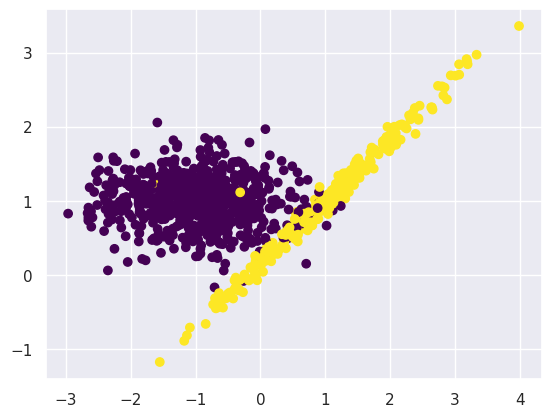

In [50]:
# prompt: from sklearn.datasets import make_classification 데이터를 생성하고 시각화 (2차원)

import matplotlib.pyplot as plt
X, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.7, 0.3], random_state=11)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()


In [51]:
from sklearn.ensemble import RandomForestClassifier
model = make_pipeline(RandomForestClassifier(n_estimators=100))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1024)
y_predict = model.fit(X_train, y_train).predict(X_test)
y_scores = model.fit(X_train, y_train).predict_proba(X_test)

In [52]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       145
           1       0.96      0.98      0.97        55

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

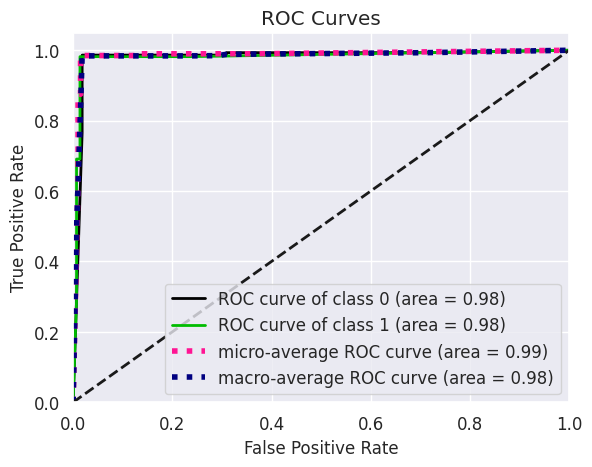

In [53]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_scores)

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

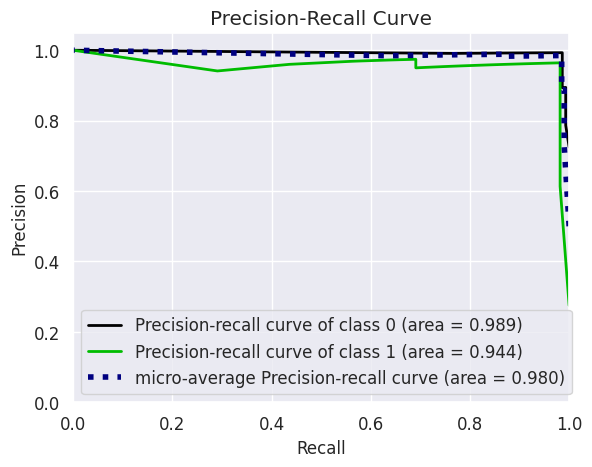

In [54]:
skplt.metrics.plot_precision_recall(y_test, y_scores)

## **Case 2. With SMOTE**
###  **Imbalanced data**

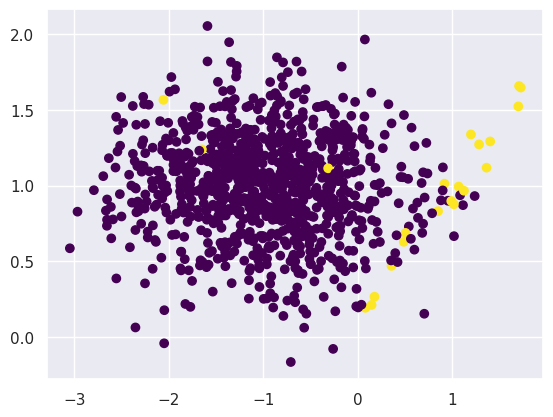

In [59]:
X, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.98, 0.02], random_state=11)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = make_pipeline(RandomForestClassifier(n_estimators=100))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1024)
y_predict = model.fit(X_train, y_train).predict(X_test)
y_scores = model.fit(X_train, y_train).predict_proba(X_test)

In [61]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       193
           1       0.75      0.43      0.55         7

    accuracy                           0.97       200
   macro avg       0.86      0.71      0.77       200
weighted avg       0.97      0.97      0.97       200



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

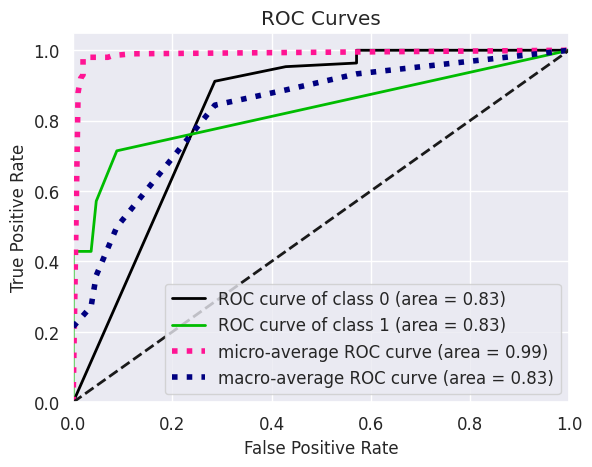

In [62]:
skplt.metrics.plot_roc(y_test, y_scores)

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

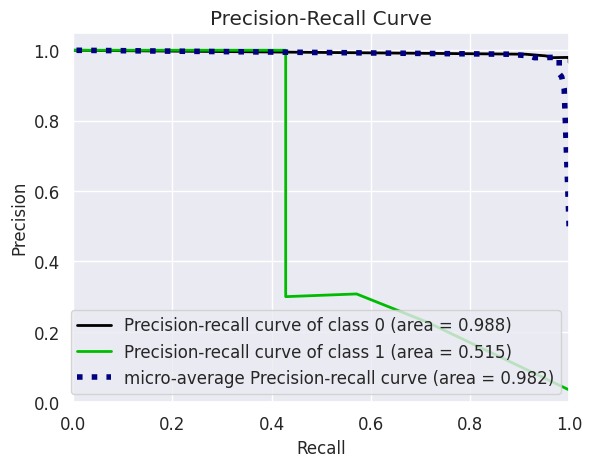

In [63]:
skplt.metrics.plot_precision_recall(y_test, y_scores)

## **[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)**

In [96]:
from imblearn.over_sampling import SMOTE  # pip install imbalearn
from collections import Counter

sm = SMOTE(sampling_strategy= 0.5, random_state=10) # 다수에 대한 소수(minority)의 비율
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


print(f'Original dataset shape {Counter(y)}')
print(f'Resampled dataset shape {Counter(y_train_smote)}')
print(f'sampling_strategy {Counter(y_train_smote)[1] / Counter(y_train_smote)[0]:.2%}')

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 784, 1: 392})
sampling_strategy 50.00%


In [97]:
model

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [98]:
y_predict = model.fit(X_train_smote, y_train_smote).predict(X_test)
y_scores = model.fit(X_train_smote, y_train_smote).predict_proba(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       193
           1       0.67      0.57      0.62         7

    accuracy                           0.97       200
   macro avg       0.83      0.78      0.80       200
weighted avg       0.97      0.97      0.97       200



### **practice : sampling_strategy 를 변동하여 classification report의 positive 에 대한 recall을 확인해보아라**

In [101]:
from sklearn import model_selection, metrics

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=11)
model_selection.cross_validate(model, X_train, y_train, scoring='recall_macro', cv=kf)
model_selection.cross_val_score(model, X_train, y_train, scoring='recall_macro', cv=kf)

{'fit_time': array([0.71109605, 0.55378246, 0.81761289, 0.47896934, 0.31116033]),
 'score_time': array([0.05359626, 0.05577493, 0.02083206, 0.02739596, 0.01371264]),
 'test_score': array([0.83333333, 0.74367089, 0.66341991, 0.496875  , 0.59677419])}

array([0.83333333, 0.74367089, 0.74675325, 0.496875  , 0.59677419])

In [102]:
model_selection.cross_val_score(model, X_train_smote, y_train_smote, scoring='recall_macro', cv=kf)

array([0.94029333, 0.91505296, 0.92701233, 0.93222916, 0.93463828])

## **다양한 Imbalance 데이터를 Handing하는 기법**

In [105]:
from imblearn.over_sampling import *
from imblearn.pipeline import make_pipeline

oversamplers = [RandomOverSampler(random_state=0), ADASYN(random_state=0),
                SMOTE(random_state=42)]
for sampler in oversamplers :
    print(sampler)
    imba_pipeline= make_pipeline(sampler, model)
    model_selection.cross_val_score(imba_pipeline, X_train, y_train, scoring='recall_macro', cv=kf)

RandomOverSampler(random_state=0)


array([0.83333333, 0.74367089, 0.74675325, 0.490625  , 0.79677419])

ADASYN(random_state=0)


array([0.80785563, 0.69936709, 0.88095238, 0.446875  , 0.93870968])

SMOTE(random_state=42)


array([0.82059448, 0.70886076, 0.89718615, 0.465625  , 0.95483871])

In [106]:
borderline_smote = [BorderlineSMOTE(random_state=13), SVMSMOTE(random_state=11)]
for sampler in borderline_smote :
    print(sampler)
    imba_pipeline= make_pipeline(sampler, model)
    model_selection.cross_val_score(imba_pipeline, X_train, y_train, scoring='recall_macro', cv=kf)

array([0.82377919, 0.73101266, 0.9004329 , 0.4875    , 0.98709677])

array([0.82377919, 0.73417722, 0.9004329 , 0.484375  , 0.98709677])

## **다양한 알고리즘을 SMOTE에 적용하기**

In [109]:
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [110]:
classifiers = {}
classifiers.update({'LGR': LogisticRegression(random_state=11, solver ='liblinear')})
classifiers.update({'SVC': SVC(random_state=11, max_iter=300, probability=True)})
classifiers.update({'Decisiontree': DecisionTreeClassifier()})
classifiers.update({'Random Forest': RandomForestClassifier()})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier()})

In [111]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import ExtraTreeClassifier

classifiers.update({'Ridge': RidgeClassifier()})
classifiers.update({'Extra Trees': ExtraTreeClassifier()})

classifiers

{'LGR': LogisticRegression(random_state=11, solver='liblinear'),
 'SVC': SVC(max_iter=300, probability=True, random_state=11),
 'Decisiontree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'Ridge': RidgeClassifier(),
 'Extra Trees': ExtraTreeClassifier()}

In [112]:
DECISION_FUNCTIONS = {'SVC', 'Ridge'}

In [113]:
parameters = {}
parameters.update({'LGR':
{
'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l1', 'l2']}
})

In [114]:
parameters.update({'SVC':
{
'classifier__kernel': ['linear', 'rbf', 'poly'],
'classifier__gamma': ['auto'],
'classifier__C': [0.1, 0.5, 1, 5, 10, 50, 100],
'classifier__degree': [1, 2, 3, 4, 5, 6]
}})

In [115]:
parameters.update({'Decisiontree':
{
'classifier__criterion' :['gini', 'entropy'],
'classifier__splitter': ['best', 'random'],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [1,2,3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
}})

In [116]:
parameters.update({'Random Forest':
{
'classifier__n_estimators': [200],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__criterion' :['gini', 'entropy']     ,
'classifier__n_jobs': [-1]
}})

In [117]:
parameters.update({'Gradient Boosting':
{
'classifier__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
'classifier__n_estimators': [200],
'classifier__max_depth': [2,3,4,5,6],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__subsample': [0.8, 0.9, 1]
}})

In [118]:
parameters.update({'Ridge':
{
'classifier__alpha': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
}})

In [119]:
parameters.update({'Extra Trees':
{
'classifier__criterion' :['gini', 'entropy'],
'classifier__splitter': ['best', 'random'],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [1,2,3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
}})

In [120]:
from tqdm import tqdm_notebook
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, recall_score, log_loss, brier_score_loss

In [137]:
results = {}
for classifier_label, classifier in tqdm_notebook(classifiers.items()):
    steps = [('scaler', StandardScaler()), ('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = parameters[classifier_label]

    gs = RandomizedSearchCV(pipeline, param_grid,
                            cv = 3,
                            n_iter = 5,
                            scoring = 'recall_macro')


    y_pred = gs.fit(X_train, y_train).predict(X_test)

    if classifier_label in DECISION_FUNCTIONS:
        y_proba = gs.decision_function(X_test)
        ap = average_precision_score(y_test, y_proba)
    else:
        y_proba = gs.predict_proba(X_test)[:,1]
        ap = average_precision_score(y_test, y_proba)


    result = {'Best Parameters': gs.best_params_,
              'Training recall_macro': gs.best_score_,
              'AUROC': roc_auc_score(y_test, y_proba),
              'Average PR': ap,
              'F1-score': f1_score(y_test, y_pred),
              'CV accuracy': cross_val_score(gs, X_train, y_train).mean(),
              'Log_loss': log_loss(y_test, y_proba),
             }

    results.update({classifier_label: result})
    dump(gs.fit(X_train, y_train), 'without_smote_%s.joblib'%classifier_label)

  0%|          | 0/7 [00:00<?, ?it/s]

['without_smote_LGR.joblib']

['without_smote_SVC.joblib']

['without_smote_Decisiontree.joblib']

['without_smote_Random Forest.joblib']

['without_smote_Gradient Boosting.joblib']

['without_smote_Ridge.joblib']

['without_smote_Extra Trees.joblib']

In [138]:
pd.DataFrame(results).T.sort_values(by = 'F1-score', ascending=False)

,Best Parameters,Training recall_macro,AUROC,Average PR,F1-score,CV accuracy,Log_loss
Decisiontree,"{'classifier__splitter': 'best', 'classifier__...",0.740891,0.84678,0.406825,0.625,0.780304,0.194464
LGR,"{'classifier__penalty': 'l2', 'classifier__C':...",0.531418,0.80829,0.67799,0.6,0.532055,0.110319
Random Forest,"{'classifier__n_jobs': -1, 'classifier__n_esti...",0.814105,0.851591,0.349196,0.555556,0.802776,0.188022
Gradient Boosting,"{'classifier__subsample': 0.9, 'classifier__n_...",0.709195,0.786084,0.481909,0.545455,0.689756,0.122758
Extra Trees,"{'classifier__splitter': 'best', 'classifier__...",0.85263,0.842339,0.406825,0.454545,0.791993,0.476761
SVC,"{'classifier__kernel': 'poly', 'classifier__ga...",0.531418,0.650629,0.345945,0.25,0.563482,1.08131
Ridge,{'classifier__alpha': 1.0},0.5,0.809771,0.678157,0.0,0.5,1.261528


In [139]:
import glob
glob.glob('wi*sm*.joblib')

['without_smote_LGR.joblib',
 'without_smote_Ridge.joblib',
 'without_smote_Extra Trees.joblib',
 'without_smote_Random Forest.joblib',
 'without_smote_Gradient Boosting.joblib',
 'without_smote_Decisiontree.joblib',
 'without_smote_SVC.joblib']

In [140]:
from sklearn.metrics import confusion_matrix

lgr = load(glob.glob('wi*sm*.joblib')[0])
y_predict = lgr.predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

array([[193,   0],
       [  5,   2]])

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       193
           1       1.00      0.29      0.44         7

    accuracy                           0.97       200
   macro avg       0.99      0.64      0.72       200
weighted avg       0.98      0.97      0.97       200



## **practice : SMOTE를 적용하여 예측하라**
### **1. Without SMOTE**

In [128]:
from imblearn.pipeline import Pipeline, make_pipeline
imba_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier())
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall_macro', cv=kf)

array([0.82059448, 0.70253165, 0.89393939, 0.465625  , 0.9483871 ])

In [132]:
parameters.keys()

dict_keys(['LGR', 'SVC', 'Decisiontree', 'Random Forest', 'Gradient Boosting', 'Ridge', 'Extra Trees'])

### **2. With SMOTE**

In [134]:
results = {}
for classifier_label, classifier in tqdm_notebook(classifiers.items()):
    steps = [('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)), ('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = parameters[classifier_label]

    gs = RandomizedSearchCV(pipeline, param_grid,
                            cv = 3,
                            n_iter = 5,
                            scoring = 'recall_macro')


    y_pred = gs.fit(X_train, y_train).predict(X_test)

    if classifier_label in DECISION_FUNCTIONS:
        y_proba = gs.decision_function(X_test)
        ap = average_precision_score(y_test, y_proba)
    else:
        y_proba = gs.predict_proba(X_test)[:,1]
        ap = average_precision_score(y_test, y_proba)


    result = {'Best Parameters': gs.best_params_,
              'Training recall_macro': gs.best_score_,
              'AUROC': roc_auc_score(y_test, y_proba),
              'Average PR': ap,
              'F1-score': f1_score(y_test, y_pred),
              'CV accuracy': cross_val_score(gs, X_train, y_train).mean(),
              'Log_loss': log_loss(y_test, y_proba),
             }

    results.update({classifier_label: result})
    dump(gs.fit(X_train, y_train), 'smote_%s.joblib'%classifier_label)

  0%|          | 0/7 [00:00<?, ?it/s]

['smote_LGR.joblib']

['smote_SVC.joblib']

['smote_Decisiontree.joblib']

['smote_Random Forest.joblib']

['smote_Gradient Boosting.joblib']

['smote_Ridge.joblib']

['smote_Extra Trees.joblib']

In [135]:
pd.DataFrame(results).T.sort_values(by = 'F1-score', ascending=False)

,Best Parameters,Training recall_macro,AUROC,Average PR,F1-score,CV accuracy,Log_loss
Random Forest,"{'classifier__n_jobs': -1, 'classifier__n_esti...",0.82557,0.819023,0.450068,0.625,0.81042,0.18621
Gradient Boosting,"{'classifier__subsample': 1, 'classifier__n_es...",0.826206,0.867135,0.576776,0.588235,0.877707,0.151306
LGR,"{'classifier__penalty': 'l2', 'classifier__C':...",0.894245,0.80607,0.677593,0.47619,0.878422,0.203708
Ridge,{'classifier__alpha': 1.0},0.877021,0.805329,0.660794,0.37037,0.873383,0.394744
SVC,"{'classifier__kernel': 'linear', 'classifier__...",0.891045,0.821614,0.678983,0.344828,0.732239,0.748664
Extra Trees,"{'classifier__splitter': 'best', 'classifier__...",0.826937,0.826795,0.252449,0.315789,0.81169,0.261563
Decisiontree,"{'classifier__splitter': 'best', 'classifier__...",0.874319,0.369726,0.030269,0.053097,0.803413,1.128962


In [136]:
lgr = load('smote_LGR.joblib')
y_predict = lgr.predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

array([[184,   9],
       [  2,   5]])

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       193
           1       0.36      0.71      0.48         7

    accuracy                           0.94       200
   macro avg       0.67      0.83      0.72       200
weighted avg       0.97      0.94      0.95       200



## **END**